In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/support2_preprocessed.csv')
df

,age,death,slos,d.time,num.co,edu,scoma,charges,totcst,totmcst,...,race_asian,race_black,race_hispanic,race_other,race_white,race_nan,ca_metastatic,ca_no,ca_yes,ca_nan
0,0.012772,0,5,2029,0,-0.253787,-0.489421,-0.487495,-0.337656,-0.274795,...,0,0,0,1,0,0,1,0,0,0
1,-0.148254,1,4,4,2,0.066259,1.296607,-0.244033,-0.337656,-0.274795,...,0,0,0,0,1,0,0,1,0,0
2,-0.635118,1,17,47,2,0.066259,-0.489421,-0.179211,-0.337656,-0.274795,...,0,0,0,0,1,0,0,1,0,0
3,-1.299617,1,3,133,2,-0.253787,-0.489421,-0.552730,-0.337656,-0.274795,...,0,0,0,0,1,0,1,0,0,0
4,1.105197,0,16,2029,1,0.066259,0.565959,-0.090466,-0.337656,-0.274795,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,0.219459,0,23,350,1,-1.213925,-0.489421,-0.063517,0.116548,0.261135,...,0,0,0,0,1,0,0,1,0,0
9101,-0.480760,0,29,347,1,-0.253787,1.174832,-0.235378,-0.129578,-0.021128,...,0,0,0,0,1,0,0,1,0,0
9102,0.495786,0,8,346,1,0.066259,-0.489421,-0.125471,0.049816,0.235178,...,0,0,0,0,1,0,0,1,0,0
9103,-1.002381,1,7,7,1,0.386305,-0.489421,-0.008804,-0.337656,-0.274795,...,0,0,0,0,1,0,0,0,1,0


In [6]:
from measures import kaplan_meier, nelson_aalen

# Kaplan-Meier Estimator

In [7]:
t, m, v = kaplan_meier(df['death'].values, df['d.time'].values)

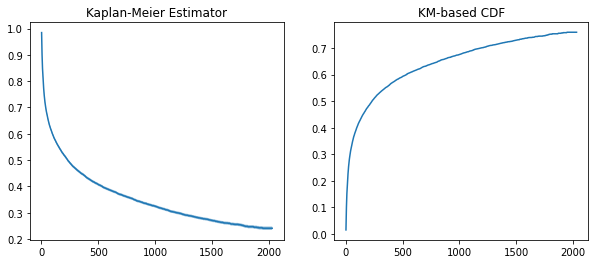

In [8]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))

ax[0].plot(t, m)
ax[0].fill_between(t, m - np.sqrt(v), m + np.sqrt(v), alpha=.5)
ax[0].set_title('Kaplan-Meier Estimator')

ax[1].plot(t, 1 - m)
ax[1].set_title('KM-based CDF')

plt.show()

# Nelson-Aalen Estimator

In [9]:
t, m, v = nelson_aalen(df['death'].values, df['d.time'].values)

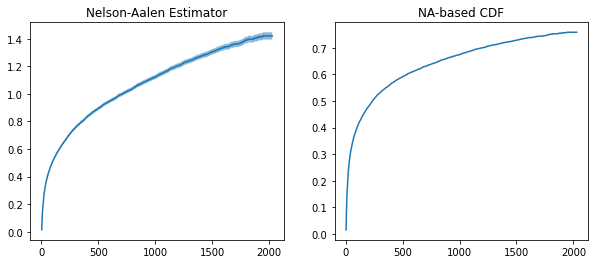

In [10]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))

ax[0].plot(t, m)
ax[0].fill_between(t, m - np.sqrt(v), m + np.sqrt(v), alpha=.5)
ax[0].set_title('Nelson-Aalen Estimator')

ax[1].plot(t, 1 - np.exp(-1 * m))
ax[1].set_title('NA-based CDF')

plt.show()

In [11]:
s_train = df['death'][:7000].values
s_test = df['death'][7000:].values

t_train = df['d.time'][:7000].values
t_test = df['d.time'][7000:].values

In [12]:
def interpolate(x, y, new_x):
    s = pd.Series(data=y, index=x)
    new_y = s.reindex(s.index.union(new_x)).interpolate()[new_x].values
    return new_y

In [13]:
t_new = np.random.rand(100) * 1900
m_new = interpolate(t, m, t_new)

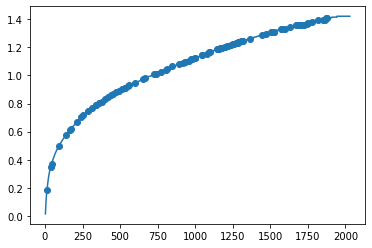

In [15]:
plt.plot(t, m)
plt.scatter(t_new, m_new)
plt.show()

In [38]:
t, m, _ = kaplan_meier(1 - s_train, t_train)
m = 1 - m

s = pd.Series(data=m, index=t)
pc = s.reindex(s.index.union(t_test)).interpolate()[t_test].values

/Users/mme4/projects/tte-performance/measures.py:16: RuntimeWarning: divide by zero encountered in true_divide
  v = (m ** 2) * np.cumsum(d / (n * (n - d)))
/Users/mme4/projects/tte-performance/measures.py:16: RuntimeWarning: invalid value encountered in multiply
  v = (m ** 2) * np.cumsum(d / (n * (n - d)))


In [44]:
len(t_test), len(pc)

(2105, 2155)

In [42]:
pc

array([0.        , 0.        , 0.        , ..., 0.00194028, 0.        ,
       0.        ])